In [33]:
from bs4 import BeautifulSoup as bs 
import pandas as pd, matplotlib.pyplot as plt, numpy as np, requests, datetime

In [34]:
webpage = requests.get("https://economictimes.indiatimes.com/marketstats/pid-0,marketcap-largecap%252Cmidcap,pageno-1,sortby-percentchange,sortorder-desc,sort-intraday,exchange-50,index-2369.cms?from=mdr")
soup = bs(webpage.content, "html.parser")

company_name = [item.get_text() for item in soup.find_all("p", class_="flt w150")]
ltp = [item.get_text() for item in soup.find_all("span", class_="ltp")]
volume = [item.get_text() for item in soup.find_all("span", class_="vol")]
d_low = [item.get_text() for item in soup.find_all("span", class_="flt")]
d_high = [item.get_text() for item in soup.find_all("span", class_="flr")]

del d_low[0:3]
del d_high[0:3]

df = pd.DataFrame({"Company Name": company_name, 
                   "Last Traded Price": ltp, 
                   "Stock Volume": volume,
                  })

df["Stock Volume"] = pd.to_numeric(df["Stock Volume"])
df["Last Traded Price"] = pd.to_numeric(df["Last Traded Price"])

df1 = pd.DataFrame({
        "Company Name": company_name,
        "Day's Low Valuation": d_low,
        "Day's High Valuation": d_high
        })
df1["Day's Low Valuation"] = pd.to_numeric(df1["Day's Low Valuation"])
df1["Day's High Valuation"] = pd.to_numeric(df1["Day's High Valuation"])

cell_hover = {
    'selector': 'td:hover',
    'props': 'background-color: #ffffb3'
}
headers = {
    'selector': 'th',
    'props': 'background-color: #000066; color: white; text-align : center'
}
caption = {
    'selector': "caption",
    'props': [("font-color", "#000066"), ("font-size", "120%"), ("text-align", "Right")]
}

styled_df = df.style.set_caption(f"Top Gainers As on {datetime.datetime.now().strftime('%Y-%B-%d, %X')}")\
                     .background_gradient() \
                     .set_properties(**{'text-align': 'center',
                                       'background-color': '#FFFFFF',
                                       'color': '#000000'
                                       }) \
                     .set_table_styles([headers,cell_hover, caption])


In [35]:
styled_df

,Company Name,Last Traded Price,Stock Volume
0,Signoria Creation Ltd.,137.550000,896.000000
1,Nagreeka Export,45.200000,719.200000
2,Rama Steel Tubes,15.250000,72135.610000
3,Loyal Textiles,588.000000,47.300000
4,IOL Chemicals,405.600000,7260.020000
5,Vibhor Steel Tubes,271.000000,805.590000
6,Somany Ceramics,674.000000,171.840000
7,Touchwood Entertainm,166.000000,22.480000
8,Moxsh Overseas Edu,138.000000,0.000000
9,Net Avenue Technolog,22.000000,136.000000


Analysis the stock market Top Gainers Live data for NSE in the duration of 1 day on The Economic Times.



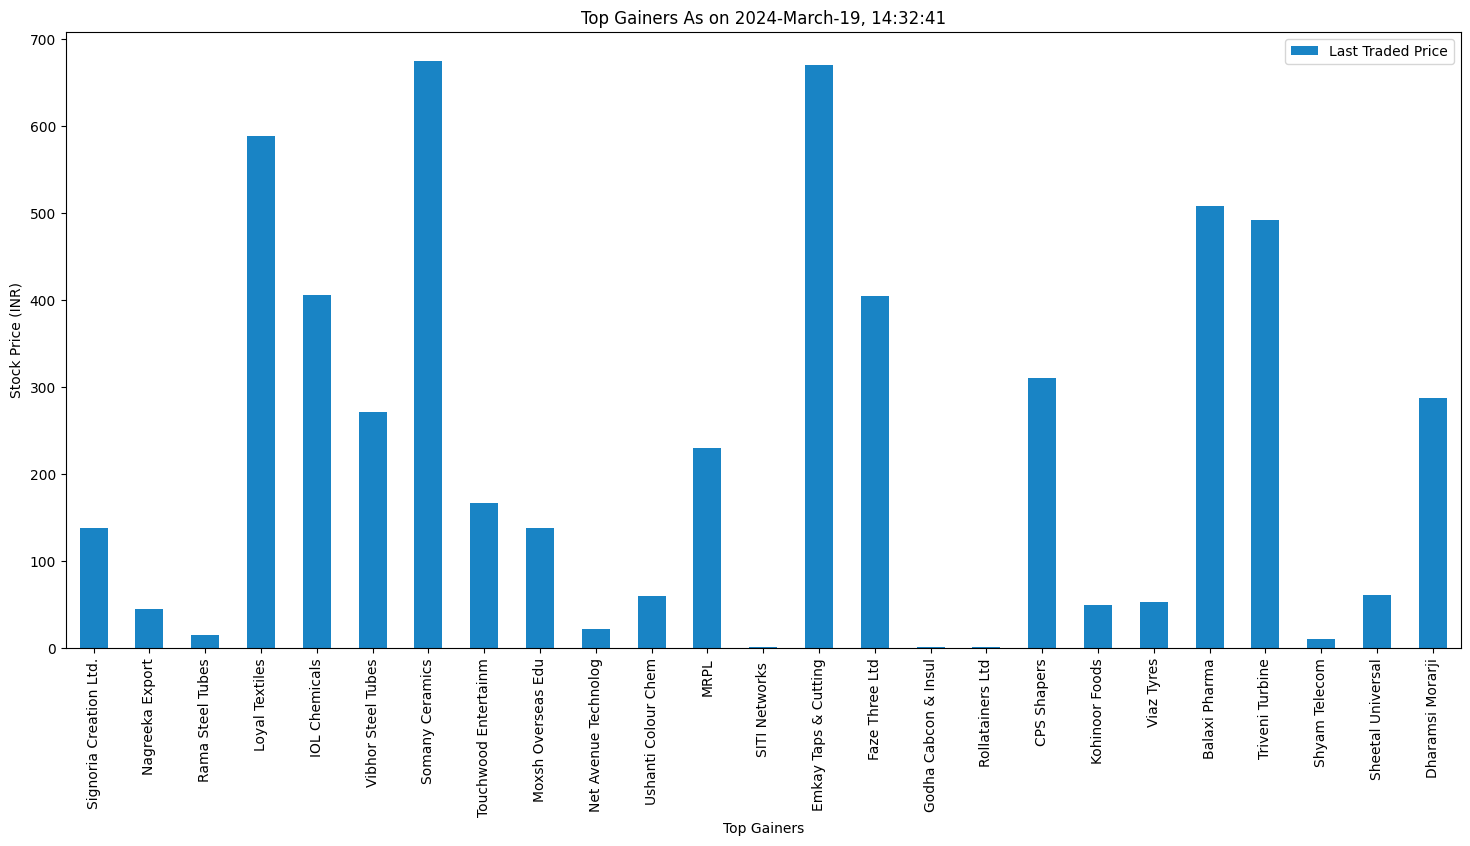

In [36]:

print("Analysis the stock market Top Gainers Live data for NSE in the duration of 1 day on The Economic Times.\n")
df.plot(
    x="Company Name",
    y="Last Traded Price",
    kind="bar",
    style="--",
    color= "#1984c5",
    figsize= (18, 8),
    title= f"Top Gainers As on {datetime.datetime.now().strftime('%Y-%B-%d, %X')}",
    xlabel= "Top Gainers",
    ylabel= "Stock Price (INR)",
    rot= 90
)
plt.xticks(np.arange(len(df["Company Name"])), df["Company Name"])

for i, price in enumerate(df["Last Traded Price"]):
    if price >= 1500:
        plt.text(i, price, "Highest Traded Price")
        
plt.show()

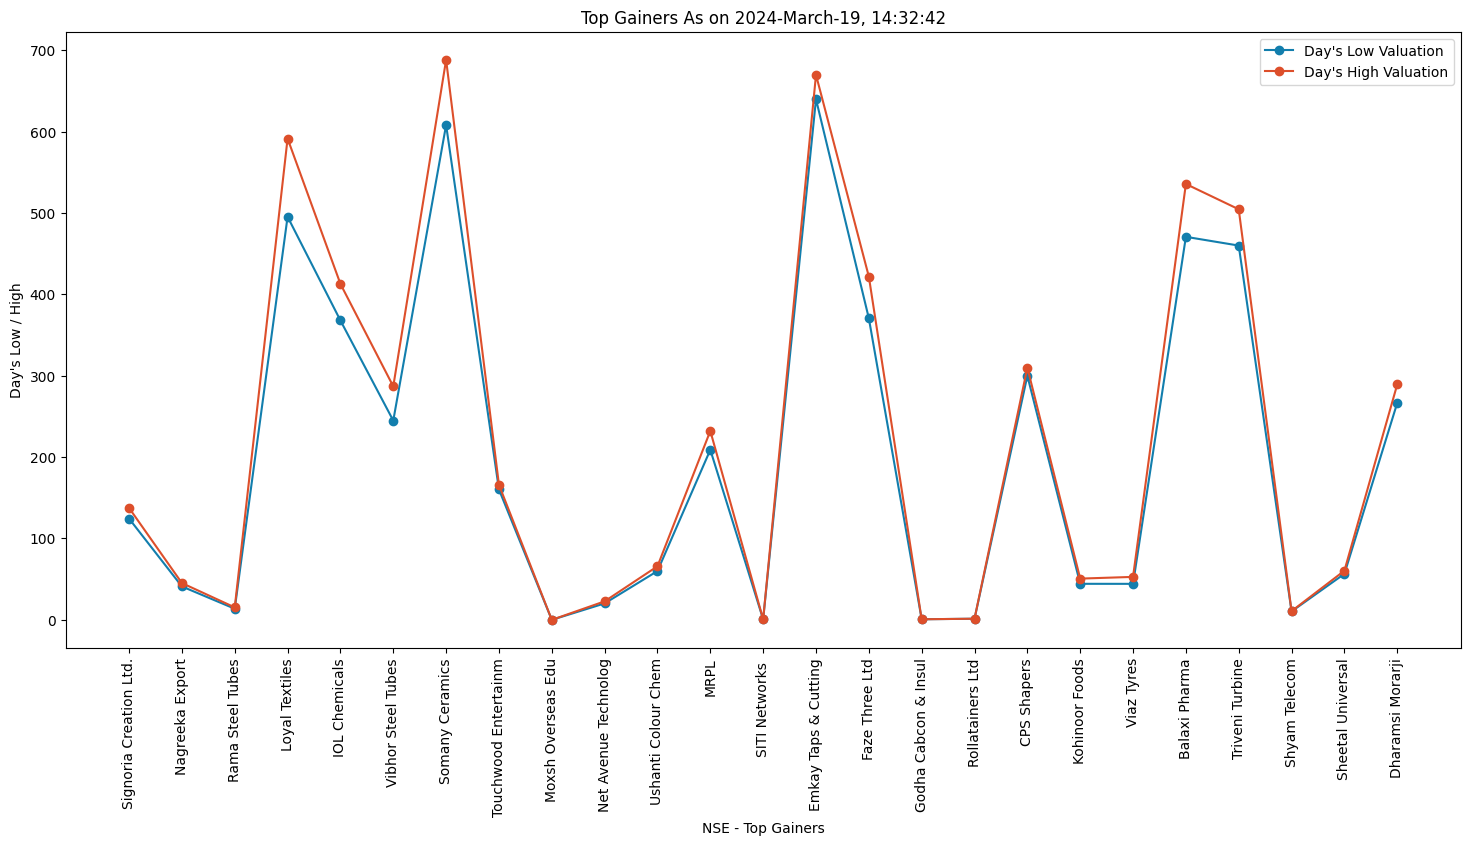

In [37]:
df1.plot(style = "o-",
         x = "Company Name",
         rot = 90,
         y = ["Day's Low Valuation","Day's High Valuation"],
         stacked=False, 
         figsize=(18, 8), 
         color={"Day's Low Valuation": "#127ead", "Day's High Valuation": "#dd4f2b"}
        )
plt.xlabel("NSE - Top Gainers")
plt.xticks(np.arange(len(df["Company Name"])), df["Company Name"])
plt.ylabel("Day's Low / High")
plt.title(f"Top Gainers As on {datetime.datetime.now().strftime('%Y-%B-%d, %X')}")

plt.show()


Stock Volume Greater than -->  1500


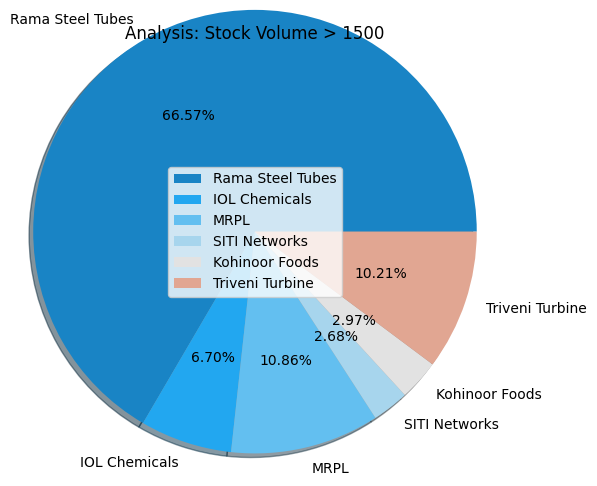

In [38]:
n = int(input("Stock Volume Greater than --> "))

plt.pie(df.loc[df["Stock Volume"] > n, "Stock Volume"], 
        labels=df.loc[df["Stock Volume"] > n, "Company Name"],
        autopct='%1.2f%%', 
        colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"],
        textprops={"fontsize": 10, "color": "black"}, 
        radius=1.5, 
        shadow=True)

plt.legend(
          loc="center")
plt.title(f"Analysis: Stock Volume > {n}")
plt.show()


Stock Volume Less than -->  50


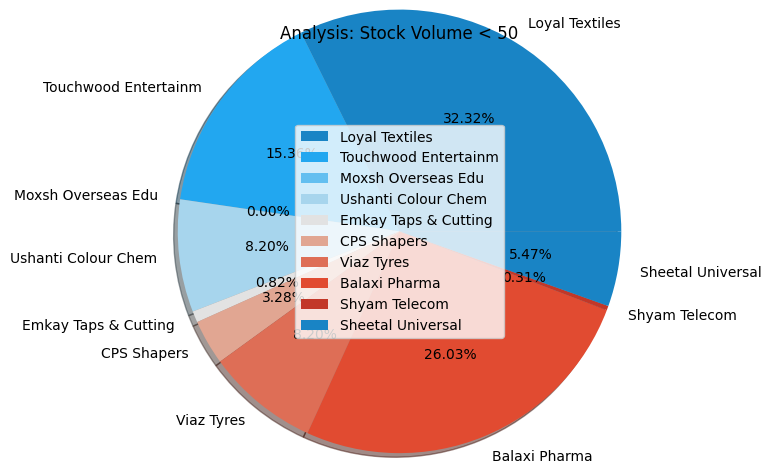

In [39]:
n = int(input("Stock Volume Less than --> "))

plt.pie(df.loc[df["Stock Volume"] < n, "Stock Volume"], 
        labels=df.loc[df["Stock Volume"] < n, "Company Name"],
        autopct='%1.2f%%', 
        colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"],
        textprops={"fontsize": 10, "color": "black"}, 
        radius=1.5, 
        shadow=True)

plt.legend(
          loc="center")
plt.title(f"Analysis: Stock Volume < {n}")
plt.show()


In [40]:
df

,Company Name,Last Traded Price,Stock Volume
0,Signoria Creation Ltd.,137.55,896.00
1,Nagreeka Export,45.20,719.20
2,Rama Steel Tubes,15.25,72135.61
3,Loyal Textiles,588.00,47.30
4,IOL Chemicals,405.60,7260.02
5,Vibhor Steel Tubes,271.00,805.59
6,Somany Ceramics,674.00,171.84
7,Touchwood Entertainm,166.00,22.48
8,Moxsh Overseas Edu,138.00,0.00
9,Net Avenue Technolog,22.00,136.00


In [41]:
df1

,Company Name,Day's Low Valuation,Day's High Valuation
0,Signoria Creation Ltd.,124.45,137.55
1,Nagreeka Export,41.05,45.20
2,Rama Steel Tubes,13.65,15.30
3,Loyal Textiles,495.50,591.65
4,IOL Chemicals,368.00,413.00
5,Vibhor Steel Tubes,244.95,287.00
6,Somany Ceramics,608.30,688.40
7,Touchwood Entertainm,160.25,166.00
8,Moxsh Overseas Edu,0.00,0.00
9,Net Avenue Technolog,20.20,22.75
